In [ ]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving subsidiKRL_prp.csv to subsidiKRL_prp.csv


In [ ]:
file = "subsidiKRL_prp.csv"
df = pd.read_csv(file)

In [ ]:
df

,date,likes,text,label
0,Mon Sep 30 12:24:19 +0000 2024,0,ngerasa krl makin padet praduga salah kata ban...,netral
1,Mon Sep 30 11:31:00 +0000 2024,2,wacana terap subsidi tarif krl dasar nomor ind...,netral
2,Sun Sep 29 15:26:36 +0000 2024,0,subsidi krl sempit dasar nik warga kian jepit,negatif
3,Sun Sep 29 12:50:51 +0000 2024,0,yakin analis trubus subsidi krl menteri bumn m...,netral
4,Sun Sep 29 12:33:14 +0000 2024,25,menteri bumn mau ubah badan amat sebut pso anc...,netral
...,...,...,...,...
1049,Wed Aug 28 10:36:47 +0000 2024,16,apbn darah darah ketemu cara benar cabut bagi ...,positif
1050,Wed Aug 28 10:30:22 +0000 2024,2,bbm gas krl busway segala subsidi model bas ni...,negatif
1051,Wed Aug 28 10:21:44 +0000 2024,0,perintah ubah skema subsidi krl jabodetabek ba...,netral
1052,Wed Aug 28 10:16:00 +0000 2024,2656,perintah ubah skema subsidi krl jabodetabek ba...,netral


In [ ]:
# Memisahkan data menjadi data latih dan data uji
x = df['text']
y = df['label']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
# Mencetak jumlah data latih dan data uji
print("Jumlah Data Latih:", len(x_train))
print("Jumlah Data Uji:", len(x_test))

Jumlah Data Latih: 843
Jumlah Data Uji: 211


In [ ]:
# Menggunakan CountVectorizer untuk mengubah teks menjadi fitur numerik
vectorizer = CountVectorizer()
x_train_vectorized = vectorizer.fit_transform(x_train)
x_test_vectorized = vectorizer.transform(x_test)

In [ ]:
naive_bayes = MultinomialNB()
naive_bayes.fit(x_train_vectorized, y_train)

MultinomialNB()

In [ ]:
prediction = naive_bayes.predict(x_test_vectorized)

accuracy = accuracy_score(y_test, prediction)
print("Akurasi:", accuracy)

print('\nUji Akurasi:\n', classification_report(y_test, prediction))

print('\nConfusion Matrix:\n', confusion_matrix(y_test, prediction))

Akurasi: 0.7630331753554502

Uji Akurasi:
               precision    recall  f1-score   support

     negatif       0.74      0.83      0.78       109
      netral       0.80      0.69      0.74       101
     positif       0.00      0.00      0.00         1

    accuracy                           0.76       211
   macro avg       0.51      0.51      0.51       211
weighted avg       0.76      0.76      0.76       211


Confusion Matrix:
 [[91 18  0]
 [31 70  0]
 [ 1  0  0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


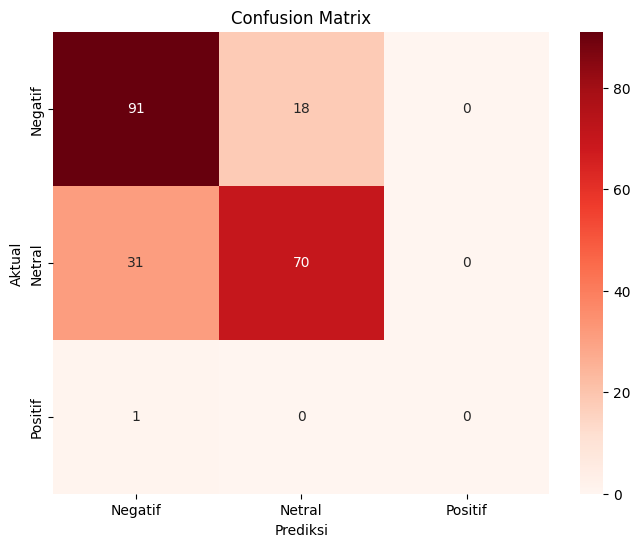

In [ ]:
conf_matrix = confusion_matrix(y_test, prediction)

# Plot Confusion Matrix
plt.figure(figsize = (8, 6))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'Reds', xticklabels = ['Negatif', 'Netral', 'Positif'], yticklabels = ['Negatif', 'Netral', 'Positif'])
plt.title('Confusion Matrix')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()